#Assigment 3: Identifying cracks and damages in structures (Concrete structures)
<br>42028 Deep Learning and Convolutional Neural Network - Autumn 2020

<br>Carlos Mario Carvajal Moreno. Student ID: 13144148
<br>Andres Felipe Lagos. Student ID: 13092248
<br>Ernest Ilustre.  Student ID: 12763239

In [ ]:
#Connecting to Google drive

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions
import zipfile

In [ ]:
cd /content/gdrive/My Drive/42028-DL-CNN-2020/Assignments/A3

/content/gdrive/My Drive/42028-DL-CNN-2020/Assignments/A3


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
#Extraction of data and placing it in the temporary folder. The models work a lot better
local_zip = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignments/A3/Concrete_Data_Final.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Setting the path directory for training and validation sets
base_dir = '/content/Concrete_Data_Final'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Val')
test_dir = os.path.join(base_dir, 'Test')

#Train
# Directory with training Pavement Cracked Pictures
train_cracked_dir = os.path.join(train_dir, '/Pavement/Cracked')
# Directory with training Pavement Uncracked Pictures
train_Uncracked_dir = os.path.join(train_dir, '/Pavement/Uncracked')
# Directory with training Pavement Cracked Pictures
train_cracked_dir = os.path.join(train_dir, '/Wall/Cracked')
# Directory with training Pavement Uncracked Pictures
train_Uncracked_dir = os.path.join(train_dir, '/Wall/Uncracked')
# Directory with training Pavement Cracked Pictures
train_cracked_dir = os.path.join(train_dir, '/Deck/Cracked')
# Directory with training Pavement Uncracked Pictures
train_Uncracked_dir = os.path.join(train_dir, '/Deck/Uncracked')



#Val
# Directory with validation Pavement Cracked pictures
val_cracked_dir = os.path.join(validation_dir, '/Pavement/Cracked')
# Directory with validation Pavement Uncracked pictures
val_Uncracked_dir = os.path.join(validation_dir, '/Pavement/Uncracked')
# Directory with validation Pavement Cracked pictures
val_cracked_dir = os.path.join(validation_dir, '/Wall/Cracked')
# Directory with validation Pavement Uncracked pictures
val_Uncracked_dir = os.path.join(validation_dir, '/Wall/Uncracked')
# Directory with validation Pavement Cracked pictures
val_cracked_dir = os.path.join(validation_dir, '/Deck/Cracked')
# Directory with validation Pavement Uncracked pictures
val_Uncracked_dir = os.path.join(validation_dir, '/Deck/Uncracked')


#Test
# Directory with validation Pavement Cracked pictures
test_cracked_dir = os.path.join(test_dir, '/Pavement/Cracked')
# Directory with validation Pavement Uncracked pictures
test_Uncracked_dir = os.path.join(test_dir, '/Pavement/Uncracked')
# Directory with validation Pavement Cracked pictures
test_cracked_dir = os.path.join(test_dir, '/Wall/Cracked')
# Directory with validation Pavement Uncracked pictures
test_Uncracked_dir = os.path.join(test_dir, '/Wall/Uncracked')
# Directory with validation Pavement Cracked pictures
test_cracked_dir = os.path.join(test_dir, '/Deck/Cracked')
# Directory with validation Pavement Uncracked pictures
test_Uncracked_dir = os.path.join(test_dir, '/Deck/Uncracked')

In [ ]:
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 16
image_size = 256

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),  # Images are size 100X100
        batch_size= batch_size,
        class_mode='categorical')

# Flow validation images in batches of 16 using test_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size= batch_size,
        class_mode='categorical')

# Flow validation images in batches of 16 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size= batch_size,
        class_mode='categorical',
        shuffle = False)

Found 12818 images belonging to 3 classes.
Found 3477 images belonging to 3 classes.
Found 39797 images belonging to 3 classes.


In [ ]:
class_dict = train_generator.class_indices
class_dict

{'Deck': 0, 'Pavement': 1, 'Wall': 2}

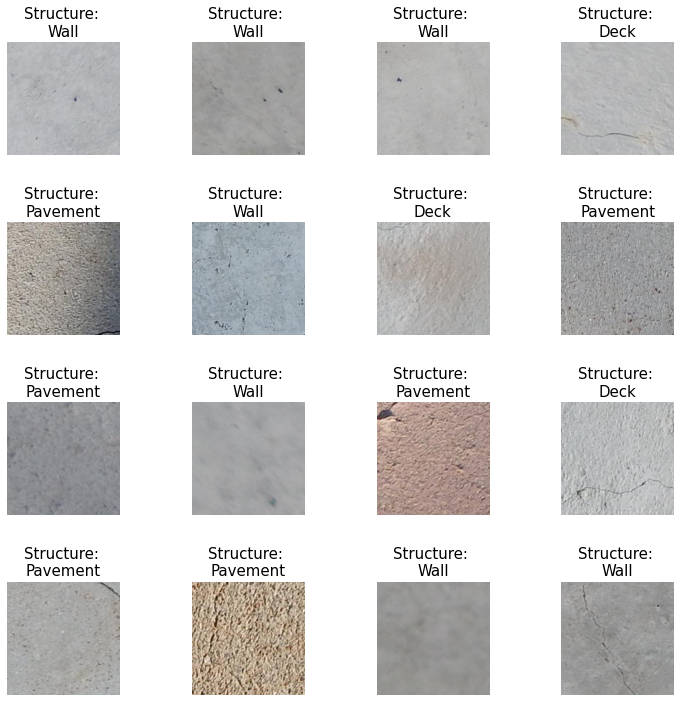

In [ ]:
#Extracting classes and their indeces
class_dict = train_generator.class_indices

#Plotting the fruits randomly from train generator
generator_index = np.random.choice(validation_generator.n//validation_generator.batch_size, size=(batch_size,))
image_pixels = 0 #0 is the index where the pixel values and the RGB values are stored in the generator
name_index = 1 #1 is the index where the one hot encoding for the labels are

plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.6, hspace=0.6)
for i in generator_index:
  images_inbatch = np.random.randint(batch_size)
  name = list(validation_generator[i][name_index][images_inbatch]).index(1)
  plt.subplot(4,4,(np.where(generator_index == i)[0][0])+1)
  plt.imshow(validation_generator[i][image_pixels][images_inbatch])
  plt.title(label=('Structure: \n{}'.format(list(class_dict.keys())[list(class_dict.values()).index(name)])), size=15)
  plt.axis('off')



In [ ]:
#Downloading the inception ResNet V2 model with imagenet weights
conv_base = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(256,256,3))

In [ ]:
model = models.Sequential()
model.add(conv_base)

model.add(layers.Conv2D(1024, kernel_size=(1,1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(3, activation='softmax'))


In [ ]:
conv_base.summary()
for layer in conv_base.layers[:-7]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)


model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 127, 127, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 127, 127, 32) 0           batch_normalization_204[0][0]    
________________________________________________________________________________

In [ ]:
#compiling the model
model.compile(optimizer= optimizers.Adamax(learning_rate=0.001),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
filepath='/content/Multiclass_weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint= ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch= train_generator.n//train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps= validation_generator.n//train_generator.batch_size,
      callbacks = [checkpoint],
      verbose=1,
      )

Epoch 1/20
801/801 [==============================] - 237s 296ms/step - loss: 0.5044 - accuracy: 0.8155 - val_loss: 0.2569 - val_accuracy: 0.8718
Epoch 2/20
801/801 [==============================] - 216s 269ms/step - loss: 0.3416 - accuracy: 0.8735 - val_loss: 0.3774 - val_accuracy: 0.8862
Epoch 3/20
801/801 [==============================] - 215s 269ms/step - loss: 0.2962 - accuracy: 0.8901 - val_loss: 0.1696 - val_accuracy: 0.9269
Epoch 4/20
801/801 [==============================] - 216s 269ms/step - loss: 0.2604 - accuracy: 0.9028 - val_loss: 0.0771 - val_accuracy: 0.9229
Epoch 5/20
801/801 [==============================] - 216s 269ms/step - loss: 0.2582 - accuracy: 0.9055 - val_loss: 0.3089 - val_accuracy: 0.9052
Epoch 6/20
801/801 [==============================] - 215s 269ms/step - loss: 0.2437 - accuracy: 0.9104 - val_loss: 0.0526 - val_accuracy: 0.9321
Epoch 7/20
801/801 [==============================] - 216s 269ms/step - loss: 0.2365 - accuracy: 0.9163 - val_loss: 0.1182 -

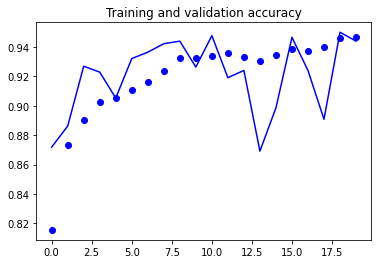

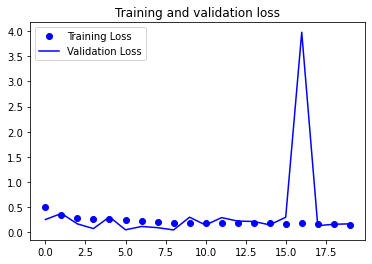

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

2488/2488 [==============================] - 314s 126ms/step


0.9285624623298645

In [ ]:
from keras.models import load_model
from keras.models import save_model


In [ ]:
cd /content/gdrive/My Drive/42028-DL-CNN-2020/Assignments/A3

/content/gdrive/My Drive/42028-DL-CNN-2020/Assignments/A3


In [ ]:
save_model(model, '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignments/A3/model_multiclass.hdf5')

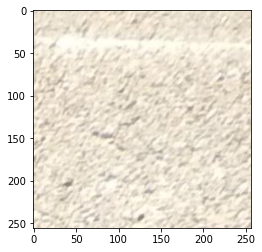

In [ ]:
img_path = '/content/Concrete_Data_Final/Val/Pavement/Uncracked/001-16.jpg'
img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
model.predict(x)

array([[0.00159063, 0.9889542 , 0.00945521]], dtype=float32)

In [ ]:
from keras.models import load_model
model2 = load_model('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignments/A3/model_multiclass.hdf5')

In [ ]:
model2.predict(x)

array([[0.00159063, 0.9889542 , 0.00945521]], dtype=float32)

In [ ]:
class_dict = train_generator.class_indices
class_dict

{'Deck': 0, 'Pavement': 1, 'Wall': 2}

## Testing

In [ ]:
y_pred = model.predict(test_generator, steps = test_generator.n // batch_size+1)
y_pred = np.argmax(y_pred, axis=1)

class_dict = test_generator.class_indices

The number of correctly classified structures is 36954 out of 39797 test samples

 Correctly Classified samples
.


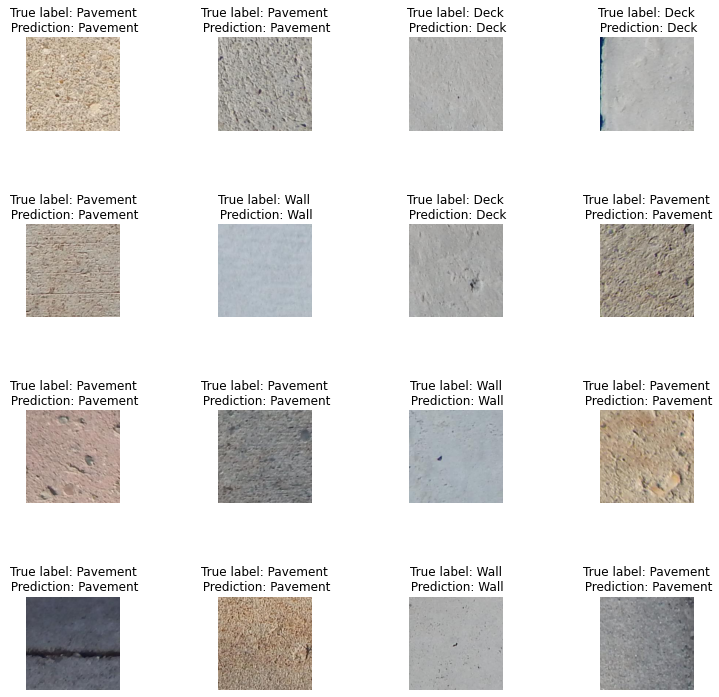

In [ ]:
misclassified_index = np.nonzero(test_generator.classes != y_pred)[0]
correct_index = np.nonzero(test_generator.classes == y_pred)[0]

print('The number of correctly classified structures is {} out of {} test samples'.\
      format(len(correct_index), test_generator.n))


print('\n Correctly Classified samples\n.')

random_images = np.random.choice(correct_index, size=(batch_size,))


plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=1, hspace=1)
for i in random_images:
  images_inbatch = i//batch_size
  index_inbatch = int((i/batch_size - i//batch_size)*batch_size)
  name = list(test_generator[images_inbatch][1][index_inbatch]).index(1)
  pred = y_pred[i]
  plt.subplot(4,4, (np.where(random_images == i)[0][0])+1)
  plt.imshow(test_generator[images_inbatch][0][index_inbatch])
  plt.title("True label: {}\n Prediction: {}".format(list(class_dict.keys())[list(class_dict.values()).index(name)], 
                                                     list(class_dict.keys())[list(class_dict.values()).index(pred)]))
                                                
  plt.axis('off')

The number of incorrectly classified Structures is 2843 out of 39797 test samples

Misclassified Structures:
.
.


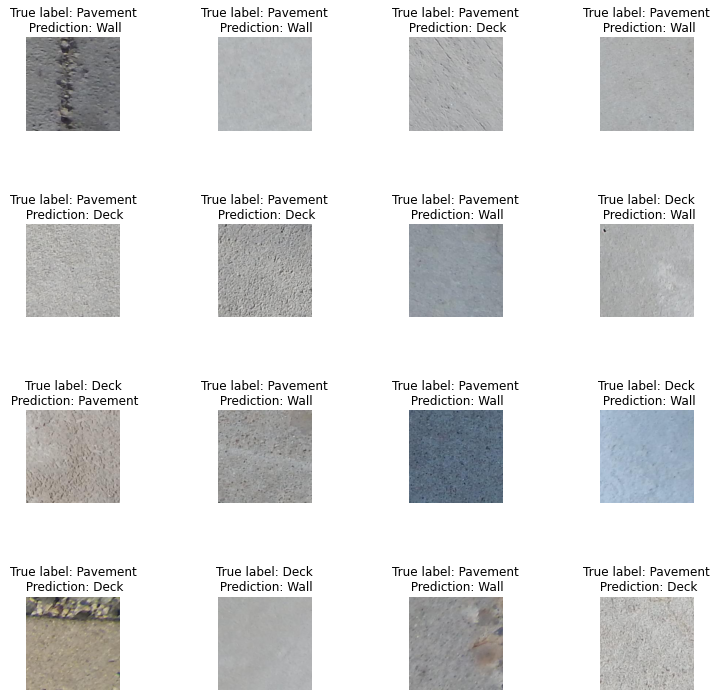

In [ ]:
print('The number of incorrectly classified Structures is {} out of {} test samples'.\
      format(len(misclassified_index), test_generator.n))

print('\nMisclassified Structures:\n.\n.')

random_images = np.random.choice(misclassified_index, size=(batch_size,))


plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=1, hspace=1)
for i in random_images:
  images_inbatch = i//batch_size
  index_inbatch = int((i/batch_size - i//batch_size)*batch_size)
  name = list(test_generator[images_inbatch][1][index_inbatch]).index(1)
  pred = y_pred[i]
  plt.subplot(4,4, (np.where(random_images == i)[0][0])+1)
  plt.imshow(test_generator[images_inbatch][0][index_inbatch])
  plt.title("True label: {}\n Prediction: {}".format(list(class_dict.keys())[list(class_dict.values()).index(name)], 
                                                     list(class_dict.keys())[list(class_dict.values()).index(pred)]))
                                                
  plt.axis('off')

## Loading a saved model.

In [ ]:
#Extraction of data and placing it in the temporary folder. The models work a lot better
local_zip = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignments/A3/A3_weights.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
## Go to the /tmp folder and copy the name of the last saved model
modelv2=tf.keras.models.load_model('/content/drive/My Drive/Weights/Pavement_weights.10-0.26.hdf5')

In [ ]:
#compiling the model
modelv2.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
#filepath='/content/drive/My Drive/Weights/Pavement_weights2.{epoch:02d}-{val_loss:.2f}.hdf5'
#checkpoint= ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
# Train the model
history = modelv2.fit(
      train_generator,
      steps_per_epoch= train_generator.n//train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps= validation_generator.n//train_generator.batch_size,
      #callbacks = [checkpoint],
      verbose=1,
      )